In [69]:
# !python
# -*- coding: utf-8 -*

__author__ = 'Erling Ween Eriksen'
__email__ = 'erlinge@nmbu.no'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

ME51 = pd.read_csv(r'ME_5_10_rand20.csv', names=['M', 'E'])
ME52 = pd.read_csv(r'ME_5_24_rand20.csv', names=['M', 'E'])
ME53 = pd.read_csv(r'ME_5_10_ord20.csv', names=['M', 'E'])
ME54 = pd.read_csv(r'ME_5_24_ord20.csv', names=['M', 'E'])

names= [ME51, ME52, ME53, ME54]
kb = 1.38 * 10 ** (-23)
titles = ['random T=1', 'random T=2.4', 'ordered T=1', 'ordered T=2.4']
labels = ['rand_1', 'rand_24', 'ord_1', 'ord_24']
Ts = [1 / kb, 2.4 / kb, 1 / kb, 2.4 / kb]


In [150]:
es = {}
ms = {}

for name, label, T in zip(names, labels, Ts):
    #print(name,)

    n_iter = len(name.index)
    plot_n = n_iter
    N_spins = 400
    burnin = 0
    plot_range = np.arange(burnin, plot_n)
    div_range = np.arange(0, plot_n-burnin)
    
    E = name.E.values[plot_range]
    M = name.M.values[plot_range]
    E_exp = np.cumsum(E) / (div_range +1)
    M_exp = np.cumsum(M) /(div_range +1)
    
    es[label] = E_exp/N_spins
    ms[label] = M_exp/N_spins
    
es = pd.DataFrame(es)
ms = pd.DataFrame(ms)


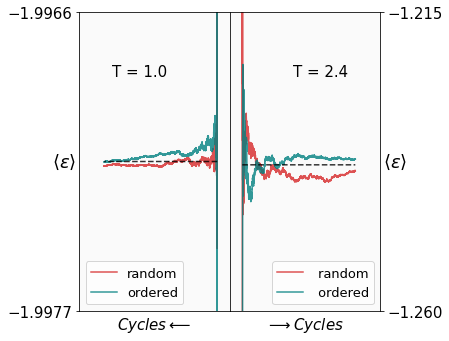

In [151]:
fig = plt.figure(figsize = (5,10))
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.0, hspace=0.00) # set the spacing between axes. 

#axs = plt.subplots(gs1[0],gs1[1], sharey=False)

axs = [plt.subplot(gs1[0]), plt.subplot(gs1[1])]

fig.set_figheight(5)
fig.set_figwidth(6.5)


axs[0].plot(es.index,es.rand_1, color='tab:red', alpha=0.8, linestyle='solid', label ='random')
axs[0].plot(es.index,es.ord_1, color='teal', alpha=0.8, linestyle='solid', label ='ordered')

axs[1].plot(es.index,es.rand_24, color='tab:red', alpha=0.8, linestyle='solid', label =' random')
axs[1].plot(es.index,es.ord_24, color='teal', alpha=0.8, linestyle='solid', label =' ordered')

mean0 = -1.99715
axs[0].plot([mean0 for _ in es.index], color='black', alpha=0.8, linestyle='dashed')

mean1 = -1.238
axs[1].plot([mean1 for _ in es.index], color='black', alpha=0.8, linestyle='dashed')

axs[0].set_xlabel(r'$Cycles \longleftarrow $')
axs[1].set_xlabel(r'$\longrightarrow Cycles $')

axs[0].set_ylim(-1.9977, -1.9966)
axs[1].set_ylim(-1.26, -1.215)
    
axs[0].set_yscale('linear')
axs[1].set_yscale('linear')

axs[1].yaxis.tick_right()
#axs[1].yaxis.label_right()

axs[0].set_xticklabels([])
axs[1].set_xticklabels([])

axs[0].set_yticks([-1.9977, -1.9966])
axs[1].set_yticks([-1.26,-1.215])

axs[0].set_xticks([])
axs[1].set_xticks([])


axs[0].set_xlim(1.10e6,-0.1e6)
axs[1].set_xlim(-0.1e6, 1.10e6)
    
axs[0].legend(loc='lower left')
axs[1].legend(loc='lower right')



font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
#plt.rc('legend',fontsize=12)
plt.rc('legend', fontsize=13)


axs[0].text(0.4, 0.8, 'T = 1.0', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
axs[1].text(0.6, 0.8, 'T = 2.4', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

axs[0].text(-0.1, 0.5, r'$\langle \epsilon \rangle$', size= 18, horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)
axs[1].text(1.1, 0.5, r'$\langle \epsilon \rangle$', size= 18, horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)


axs[0].set_facecolor((0.98, 0.98, 0.98))
axs[1].set_facecolor((0.98, 0.98, 0.98))
plt.tight_layout()
plt.savefig('prob5_e.pdf')
plt.show()